Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Car 0.0 0 -1.79 683.89 178.68 807.31 262.19 1.45 1.58 3.58 2.55 1.59 14.52 -1.61 7.38
Car 0.00 0 -1.77 685.05 181.43 804.68 258.21 1.40 1.61 4.37 2.69 1.60 15.58 -1.61


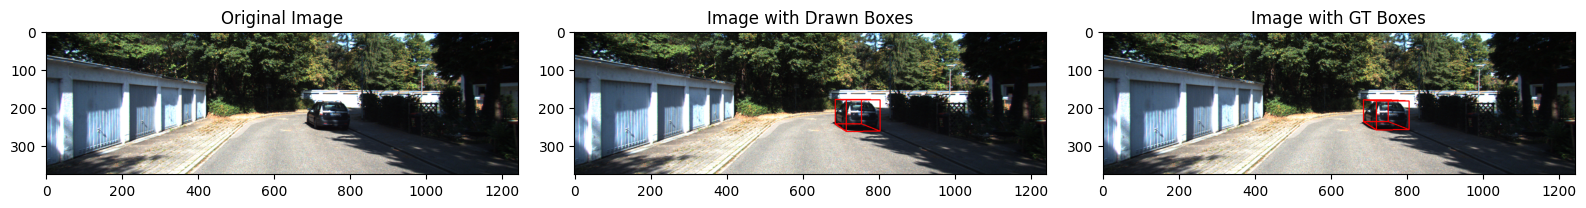

In [1]:
import cv2
import numpy as np
from utilities.datasets.kitti.kitti_utils import Calibration, Object3d
from utilities.datasets.utils import draw_projected_box3d, draw_projected_box3d_2
import matplotlib.pyplot as plt

file_path = '/Users/strom/Desktop/monodle/outputs/data/000020.txt'  # Replace with the actual path to your .txt file

image_path = "/Users/strom/Desktop/monodle/data/KITTI/object/training/image_2/000020.png"
path = "/Users/strom/Desktop/monodle/data/KITTI/object/training/calib/000020.txt"
gt_path = "/Users/strom/Desktop/monodle/data/KITTI/object/training/label_2/000020.txt"

image = plt.imread(image_path)

fig, axs = plt.subplots(1, 3, figsize=(16, 8))

# Plot original image
axs[0].imshow(image)
axs[0].set_title('Original Image')

with open(file_path, 'r') as file:
    for line in file:
        line = line.strip()  # Remove leading/trailing whitespace and newline characters
        # Process each line here
        print(line)
        test_obj = Object3d(line)
        calib_3D = Calibration(path)
        _, boxes_corner = calib_3D.corners3d_to_img_boxes(np.resize(test_obj.generate_corners3d(), (1, 8, 3)))
        boxes = np.resize(boxes_corner, (8, 2))[::-1]
        image2 = draw_projected_box3d(image, boxes, color=(255, 0, 0), thickness=2)

# Plot image with drawn boxes
axs[1].imshow(image2)
axs[1].set_title('Image with Drawn Boxes')

image = plt.imread(image_path)

with open(gt_path, 'r') as file:
    for line in file:
        line = line.strip()  # Remove leading/trailing whitespace and newline characters
        # Process each line here
        print(line)
        test_obj = Object3d(line)
        calib_3D = Calibration(path)
        _, boxes_corner = calib_3D.corners3d_to_img_boxes(np.resize(test_obj.generate_corners3d(), (1, 8, 3)))
        boxes = np.resize(boxes_corner, (8, 2))[::-1]
        image3 = draw_projected_box3d(image, boxes, color=(255, 0, 0), thickness=2)

# Plot image with drawn GT boxes
axs[2].imshow(image3)
axs[2].set_title('Image with GT Boxes')

plt.tight_layout()
plt.show()

2023-05-31 21:09:19,699   INFO  ==> Done


checkpoint loaded


Evaluation Progress: 100%|██████████| 11/11 [00:17<00:00,  1.58s/it]
2023-05-31 21:09:37,058   INFO  ==> Saving ...


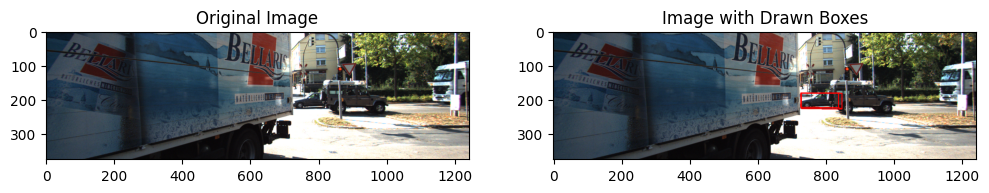

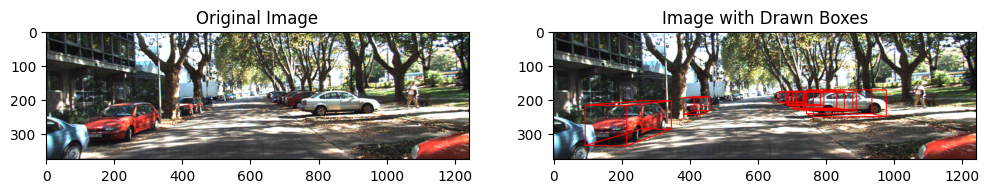

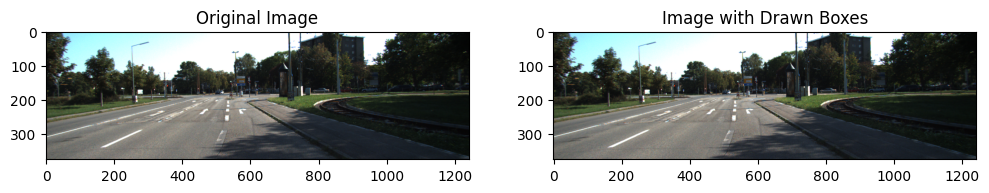

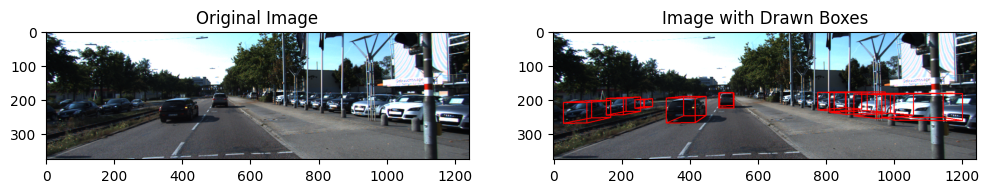

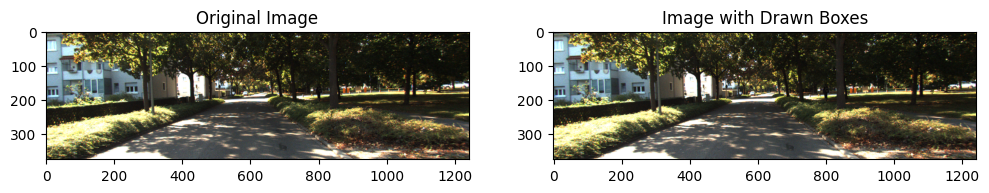

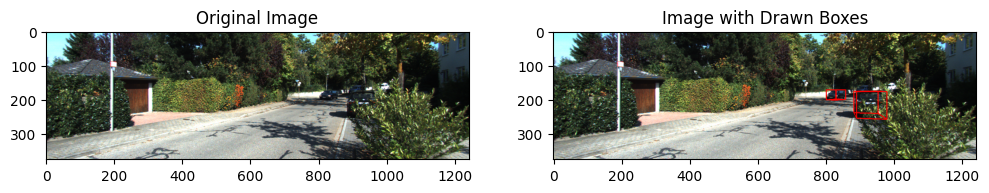

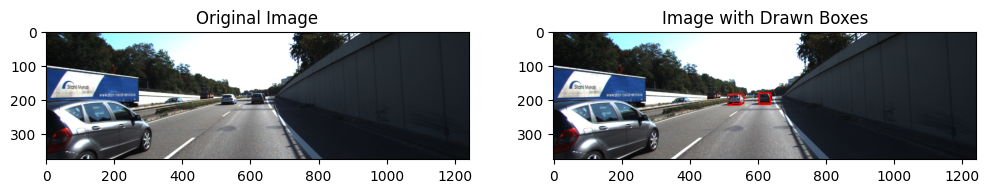

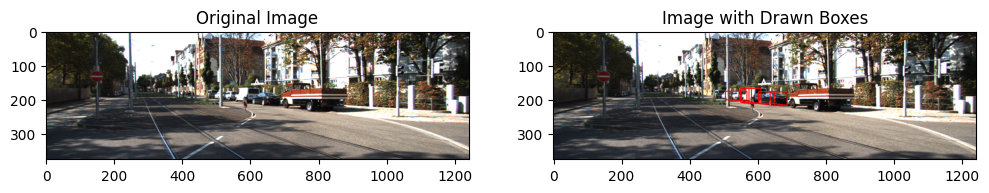

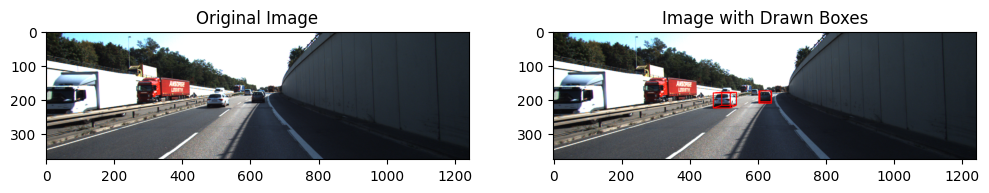

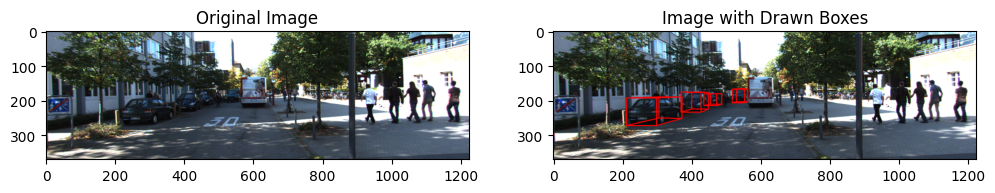

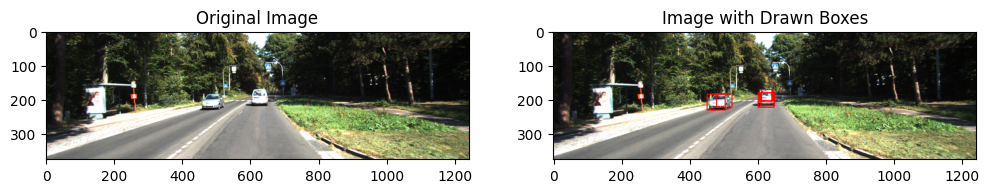

In [2]:
from inference import main

#define number of random inference to perfom on kitti dataset
nbr_inference = 11

main(nbr_inference)

In [3]:
from inference_scene_DLAV import main

#define the number of inference you want to do on the DLAV dataset scene 1
nbr_inference=300

main(nbr_inference)

2023-05-31 21:09:41,803   INFO  ==> Done
2023-05-31 21:09:41,803   INFO  ==> Done


checkpoint loaded


Evaluation Progress: 100%|██████████| 300/300 [00:15<00:00, 19.00it/s]
2023-05-31 21:09:57,677   INFO  ==> Saving ...
2023-05-31 21:09:57,677   INFO  ==> Saving ...


In [4]:
#create the gif for the last scene
from PIL import Image
import imageio

image_paths = []
# List of image file paths
for i in range(nbr_inference):
    image_paths.append(f"/Users/strom/Desktop/monodle/outputs/scene1/{i}"+".png") #change absolute path to yours

# Create a list to store the PIL Image objects
images = []

# Load each image and append it to the images list
for image_path in image_paths:
    image = Image.open(image_path)
    images.append(image)

# Save the images as a GIF using imageio
output_path = "/Users/strom/Desktop/scene1.gif" #change absolute path to yours
imageio.mimsave(output_path, images, duration=0.2)

In [ ]:
with open("/Users/strom/Desktop/monodle/data/DLAV/ImageSets/test.txt", "w") as file:
    for i in range(1, 1550):
        number = str(i).zfill(5)  # Pad the number with zeros
        file.write(number + "\n")